<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/6.%20Week%206/Clusteringweek06_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Data

In [5]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Membaca file CSV
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
data = pd.read_csv(url)

# Menampilkan informasi dataset
print("Informasi dataset:")
print(data.info())

# Menampilkan beberapa baris pertama dari dataset
print("\nHead dataset:")
print(data.head())

# 1. Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# 2. Mengisi missing values (jika ada)
# Misalnya, kita mengganti missing values dengan rata-rata untuk kolom numerik
data.fillna(data.mean(), inplace=True)

# 3. Cek duplikasi data
print("\nJumlah duplikasi data:")
print(data.duplicated().sum())

# 4. Menghapus duplikasi (jika ada)
data.drop_duplicates(inplace=True)

# 5. Cek tipe data kolom
print("\nTipe data kolom:")
print(data.dtypes)

# 6. Jika ada data kategorikal, kita akan melakukan encoding. Misalnya, dengan one-hot encoding
# Cek apakah ada kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nKolom kategorikal:")
print(categorical_columns)

# Jika ada kolom kategorikal, kita lakukan encoding (One-Hot Encoding)
if len(categorical_columns) > 0:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 7. Normalisasi fitur (scaling data)
# Menggunakan StandardScaler untuk menormalkan data sehingga memiliki mean = 0 dan std = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 8. Data yang sudah dinormalisasi menjadi DataFrame
data_normalized = pd.DataFrame(data_scaled, columns=data.columns)

# Menampilkan data yang sudah diproses
print("\nData setelah preprocessing (normalisasi):")
print(data_normalized.head())

# 9. Cek kembali missing values setelah pengisian
print("\nCek missing values setelah pengisian:")
print(data_normalized.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-n

#2. Membuat Model Clustering


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-n

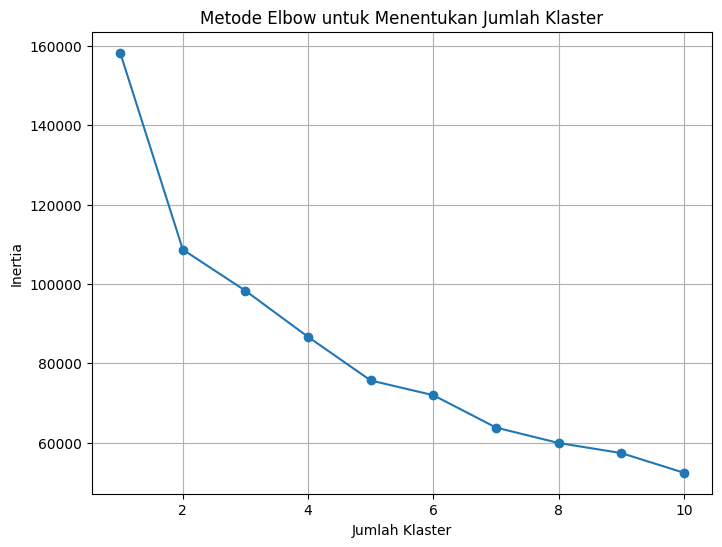


Data dengan label klaster:
    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x14       x15       x16       x17       x18  \
0 -0.171128  0.124676  ...  0.082245  0.135752 -0.024017 -0.108351 -0.077623   
1 -0.207693  0.170883  ...  0.022786  0.163320  0.012022 -0.090974 -0.056510   
2 -0.219153  0.232538  ...  0.050791  0.207338  0.083536 -0.050691 -0.023590   
3 -0.098181  0.270375  ... -0.011567  0.100413 -0.050224 -0.136009 -0.177037   
4 -0.172700  0.266434  ...  0.037439  0.219153  0.062837 -0.048885 -0.053074   

        x1

In [6]:
# 1. Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 2. Membaca dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
data = pd.read_csv(url)

# 3. Menampilkan informasi dataset
print("Informasi dataset:")
print(data.info())
print("\nHead dataset:")
print(data.head())

# 4. Preprocessing data (mengisi missing values dan normalisasi)
data.fillna(data.mean(), inplace=True)  # Mengisi missing values dengan rata-rata kolom
scaler = StandardScaler()  # Standarisasi data
data_scaled = scaler.fit_transform(data)

# 5. Tentukan jumlah klaster yang optimal dengan menggunakan metode Elbow
inertia = []
range_n_clusters = range(1, 11)  # Menguji jumlah klaster dari 1 sampai 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik Elbow untuk menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 6. Melakukan klastering dengan jumlah klaster yang optimal (misalnya, 3)
optimal_clusters = 3  # Berdasarkan hasil Elbow atau eksperimen
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# 7. Menambahkan hasil klaster ke dalam dataset
data['Cluster'] = kmeans.labels_

# 8. Menampilkan data dengan label klaster
print("\nData dengan label klaster:")
print(data.head())

# 9. Evaluasi model menggunakan Silhouette Score dan Calinski-Harabasz Score
sil_score = silhouette_score(data_scaled, kmeans.labels_)
calinski_score = calinski_harabasz_score(data_scaled, kmeans.labels_)

print(f"\nSilhouette Score: {sil_score}")
print(f"Calinski-Harabasz Score: {calinski_score}")


#3. Menghitung Matriks Cluster


## Elbow Methode

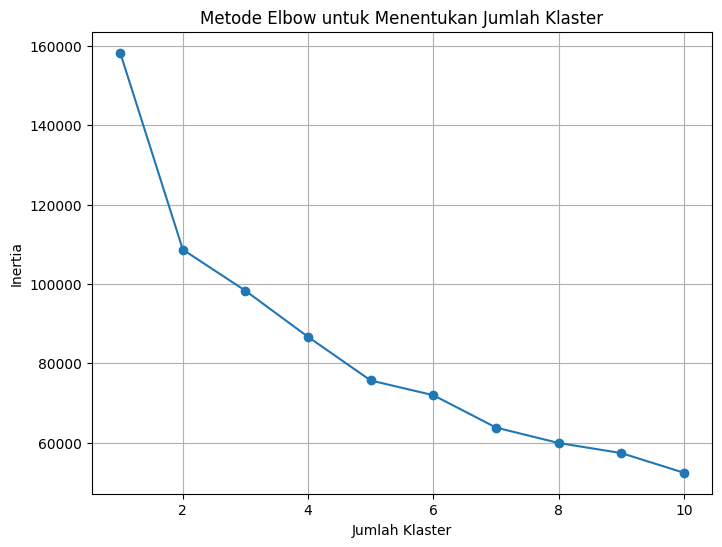

In [8]:
# Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
range_n_clusters = range(1, 11)  # Menguji jumlah klaster dari 1 sampai 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik Elbow
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



## Silhouette Coefficient

In [9]:
from sklearn.metrics import silhouette_score

# Menggunakan jumlah klaster yang optimal (misalnya 3 dari metode Elbow sebelumnya)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Menghitung Silhouette Coefficient
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Coefficient untuk {optimal_clusters} klaster: {silhouette_avg}")


Silhouette Coefficient untuk 3 klaster: 0.3336517041041939


##Calinski-Harabasz Index

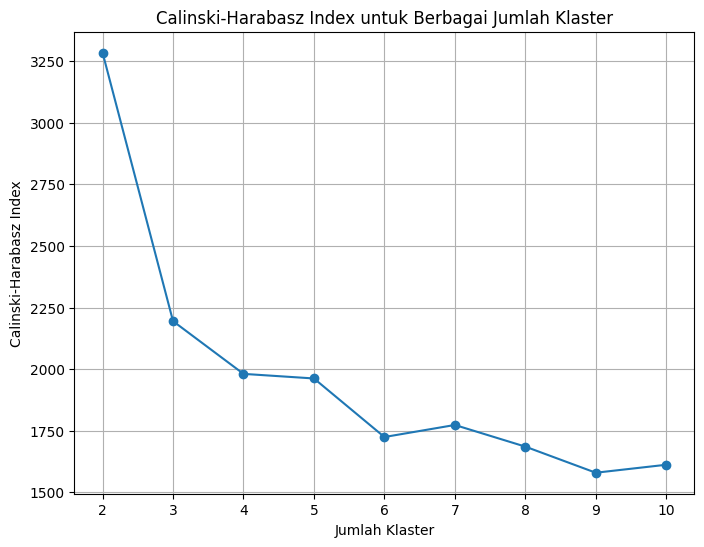

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

# Menentukan jumlah klaster yang akan diuji
range_n_clusters = range(2, 11)  # Menguji jumlah klaster dari 2 sampai 10

calinski_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    score = calinski_harabasz_score(data_scaled, kmeans.labels_)
    calinski_scores.append(score)

# Plot grafik Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index untuk Berbagai Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()



##Dunn Index

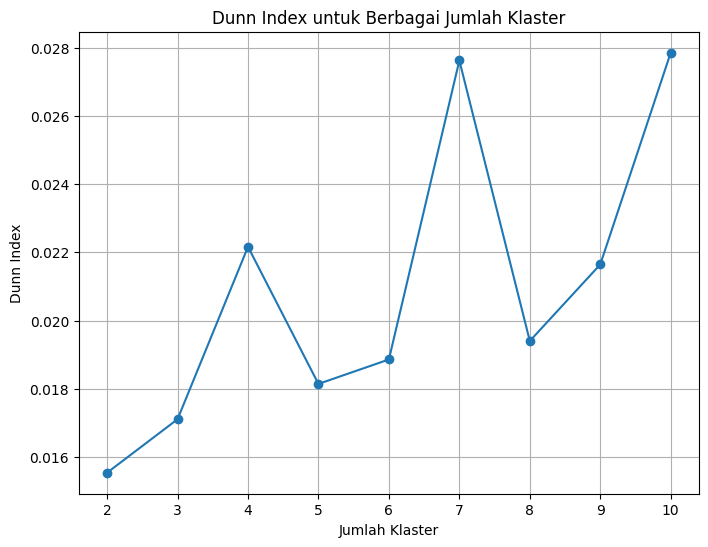

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

def dunn_index(data, labels):
    # Menghitung jarak antar setiap titik
    dist_matrix = pairwise_distances(data)

    # Menentukan jumlah klaster
    n_clusters = len(np.unique(labels))

    # Inisialisasi variabel
    min_inter_cluster_distance = np.inf
    max_intra_cluster_distance = -np.inf

    # Loop untuk setiap pasangan klaster
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            # Menemukan titik dari klaster i dan j
            cluster_i = np.where(labels == i)[0]
            cluster_j = np.where(labels == j)[0]

            # Menghitung jarak terkecil antara titik di klaster i dan klaster j
            inter_cluster_distance = np.min(dist_matrix[cluster_i][:, cluster_j])
            min_inter_cluster_distance = min(min_inter_cluster_distance, inter_cluster_distance)

    # Loop untuk menghitung diameter masing-masing klaster
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        intra_cluster_distances = pairwise_distances(cluster_points)
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_cluster_distances))

    # Menghitung Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

# Menentukan jumlah klaster yang akan diuji
range_n_clusters = range(2, 11)  # Menguji jumlah klaster dari 2 sampai 10 (minimal 2 klaster)

dunn_scores = []

# Menghitung Dunn Index untuk berbagai jumlah klaster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    score = dunn_index(data_scaled, kmeans.labels_)
    dunn_scores.append(score)

# Plot grafik Dunn Index
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, dunn_scores, marker='o')
plt.title('Dunn Index untuk Berbagai Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Dunn Index')
plt.grid(True)
plt.show()



# Evaluasi Clustering

Berikut adalah beberapa persamaan evaluasi clustering yang digunakan:



## 1. Elbow Methode (SSE)
 Elbow method menghitung nilai inertia untuk berbagai jumlah cluster. Inertia adalah jumlah kuadrat jarak Euclidean antara setiap titik dengan pusat cluster-nya.

Fungsi objektif dalam KMeans didefinisikan sebagai:

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

- $(K)$ : jumlah cluster  
- $(C_k)$ : himpunan titik pada cluster ke-\(k\)  
- $(\mu_k)$ : pusat (mean) dari cluster ke-\(k\)

Titik "elbow" yang ditunjukkan pada grafik menunjukkan jumlah cluster yang optimal.

---

## 2. Silhouette Coefficient

Silhouette coefficient mengukur seberapa mirip setiap titik dengan cluster-nya dibandingkan dengan cluster lain. Untuk setiap data $(i)$:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$


- **$a(i)$**: jarak rata-rata dari titik $i$ ke semua titik lain dalam cluster yang sama (intra-cluster distance),  
- **$b(i)$**: jarak rata-rata dari titik $i$ ke semua titik pada cluster terdekat yang berbeda (nearest-cluster distance).

Nilai $s(i)$ berkisar dari -1 (cluster yang tidak sesuai) hingga +1 (cluster yang sangat kompak).

Nilai rata-rata silhouette mendekati 1 menunjukkan pemisahan cluster yang baik.

Kelebihan: mudah diinterpretasi dan memberikan insight per titik.

---

## 3. Calinski-Harabasz Index

Indeks ini mengukur seberapa baik cluster yang terbentuk dengan menghitung rasio variansi antar cluster terhadap variansi dalam cluster:

$$
CH = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$

- **$N$**: jumlah total data,  
- **$k$**: jumlah cluster,  
- **Between-Cluster Dispersion**: mengukur jarak antar centroid cluster,  
- **Within-Cluster Dispersion**: mengukur jarak antara titik data dengan centroid cluster masing-masing.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah.

---

## 4. Dunn Index

Dunn Index mendefinisikan kualitas clustering dengan mengambil rasio antara jarak antar cluster minimum dan diameter maksimal di antara setiap cluster:

$$
\text{Dunn} = \frac{\min_{i \neq j} \; \delta(C_i,C_j)}{\max_{1 \leq k \leq K} \; \Delta(C_k)}
$$

- **$\delta(C_i,C_j)$**: jarak minimum antara tiap titik dari cluster $C_i$ dengan tiap titik dari cluster $C_j$,  
- **$\Delta(C_k)$**: diameter cluster $C_k$, yakni jarak maksimum antara dua titik dalam cluster yang sama.

Nilai Dunn Index yang besar menandakan adanya pemisahan antar cluster yang baik dan cluster yang kompak.

---

Metriks Terbaik:
- Elbow Method membantu menentukan jumlah cluster dengan menganalisis perubahan inertia, namun kurang eksplisit dalam memberi batasan untuk cluster yang “baik”.

- Silhouette Coefficient sangat populer karena mengkombinasikan informasi intra- dan inter-cluster serta mudah diinterpretasi.

- Calinski-Harabasz Index juga banyak digunakan karena sederhana dan cepat.

- Dunn Index memberikan gambaran yang sangat jelas mengenai pemisahan dan kompaksi cluster, tetapi terkadang sulit untuk dihitung pada dataset besar.

Dalam praktiknya, Silhouette Coefficient sering dijadikan patokan karena memberikan nilai yang relatif mudah dipahami, sementara Calinski-Harabasz Index bisa dipakai sebagai konfirmasi tambahan.

